<a href="https://colab.research.google.com/github/rafid-mirza/project_gss/blob/main/Project%20GSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Created an account and selected variables from the GSS explorer (https://gssdataexplorer.norc.org/variables/vfilter), then exported them into my own excel

# DATA CLEANING FOR WWWHR VARIABLE

data = pd.read_excel('./data/wwwhr.xlsx')
# print(data.head())
# print(data.describe())

codes_to_remove = ['.i:  Inapplicable', '.p:  Not applicable (I have not faced this decision)/Not imputable', '.d:  Do not Know/Cannot Choose', '.n:  No answer']

# Remove rows with the specified codes to get rid of unusable data
cleaned_data = data[~data['wwwhr'].isin(codes_to_remove)].copy()

# Replace "0 hours" with 0 and "168 hours" with 168
cleaned_data['wwwhr'] = cleaned_data['wwwhr'].replace("0 hours", 0)
cleaned_data['wwwhr'] = cleaned_data['wwwhr'].replace("168 hours", 168)

# Convert 'wwwhr' to numeric, making non-convertible values NaN
cleaned_data['wwwhr'] = pd.to_numeric(cleaned_data['wwwhr'], errors='coerce')

# Remove all rows with NaN values in 'wwwhr'
cleaned_data.dropna(subset=['wwwhr'], inplace=True)

print(cleaned_data.head())
print(cleaned_data.describe())


       year  id_  wwwhr
38116  2000    1    5.0
38119  2000    4    2.0
38120  2000    5    1.0
38122  2000    7    0.0
38124  2000    9    1.0
               year           id_         wwwhr
count  17186.000000  17186.000000  17186.000000
mean    2012.449901   1559.351682     11.127080
std        7.547115   1030.925901     15.244951
min     2000.000000      1.000000      0.000000
25%     2006.000000    721.000000      2.000000
50%     2014.000000   1446.000000      5.000000
75%     2021.000000   2216.000000     15.000000
max     2022.000000   4506.000000    168.000000


In [5]:
# Another approach to get the data is via fetching it from the parquet files

"""
The function below fetches and concatenates the three parquet dataset. This should
return the entire datast. In addition, it also creates a csv files that gets the
list of variables/features you want to save. Code retrieved from the get_gss.ipynb
file.

@output_filename : string that specifies the name of the output .csv file
@var_list: list of variables to save
"""
def fetch_gss_chunks(output_filename, var_list):
  # var_list = ['wrkstat', 'prestige'] # List of variables you want to save
  output_filename = output_filename + ".csv" # Name of the file you want to save the data to
  #
  modes = ['w','a'] # Has write mode and append mode
  phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
  #
  for k in range(3): # for each chunk of the data
      url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
      print(url) # Check the url is correct
      df = pd.read_parquet(url) # Download this chunk of data
      print(df.head()) # Visually inspect the first few rows
      df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode=modes[phase], # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
      phase = 1 # Switch from write mode to append mode

  return df


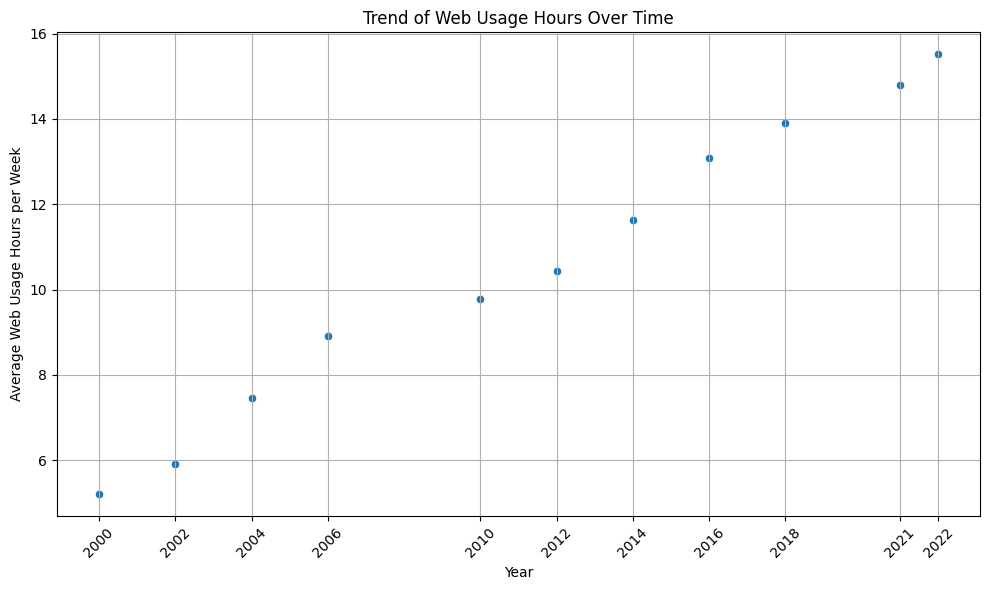

,year,wwwhr
0,2000,5.208417
1,2002,5.907878
2,2004,7.458554
3,2006,8.909548
4,2010,9.769524
5,2012,10.445535
6,2014,11.618299
7,2016,13.078135
8,2018,13.906021
9,2021,14.802514


In [6]:
# VISUALIZATION FOR WWWWHR VARIABLE
# We see average web usage increase each year, indicating a wider acceptance of technology/internet usage as time passes and technology advances.

# Calculate the average web usage hours per year
yearly_avg_hours = cleaned_data.groupby('year')['wwwhr'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_avg_hours, x='year', y='wwwhr')
plt.title('Trend of Web Usage Hours Over Time')
plt.xlabel('Year')
plt.ylabel('Average Web Usage Hours per Week')
plt.grid(True)
plt.xticks(yearly_avg_hours['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

yearly_avg_hours

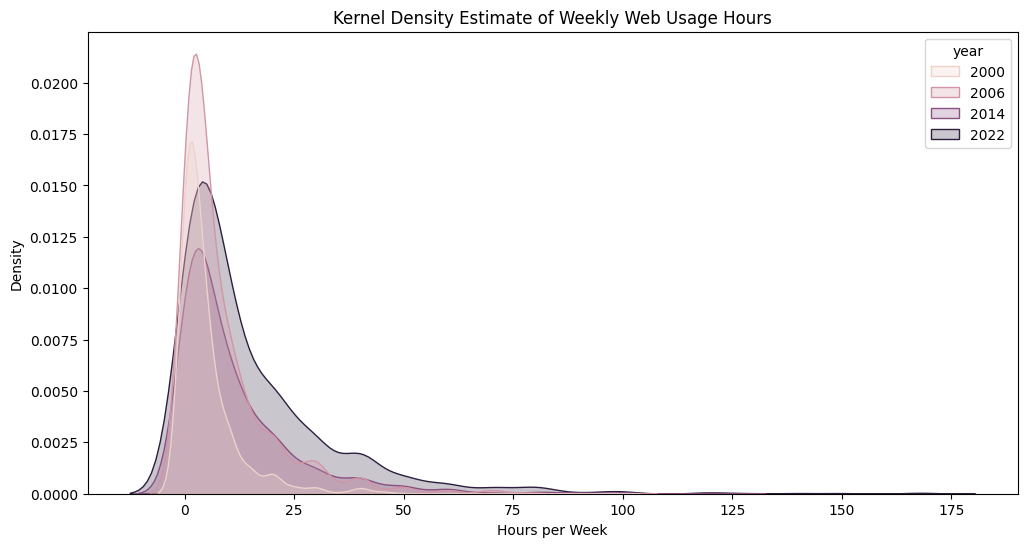

In [7]:
# With the KDE plot, we see a clear rightward shift in the peaks from 2000 to 2022. This indicates an overall increase in the number of hours spent on the web per week over time.
# It suggests that, on average, people are using the web more as the years progress. The width of the distributions seems to broaden slightly over time as well, indicating that
# the variability in web usage hours among individuals has increased.

# Filter the dataset for a few selected years for clarity
selected_years = cleaned_data[cleaned_data['year'].isin([2000, 2006, 2014, 2022])]

# Plotting
plt.figure(figsize=(12, 6))
sns.kdeplot(data=selected_years, x='wwwhr', hue='year', fill=True)
plt.title('Kernel Density Estimate of Weekly Web Usage Hours')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.show()

In [8]:
# DATA CLEANING FOR WEBMOB VARIABLE

data = pd.read_excel('./data/webmob.xlsx')
# print(data.head())
# print(data.describe())

codes_to_remove.extend(['.n:  No answer', '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web'])

# Remove rows with the specified codes to get rid of unusable data
cleaned_data = data[~data['webmob'].isin(codes_to_remove)].copy()

# print(cleaned_data.head())
# print(cleaned_data.describe())

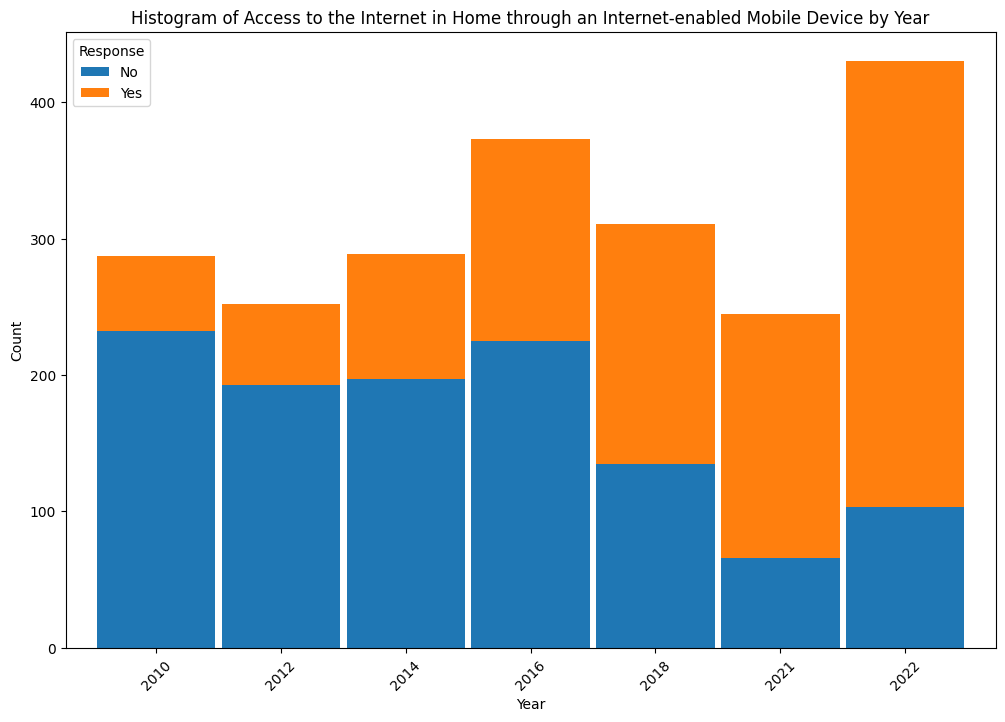

,Year,Total Responses
0,2010,287
1,2012,252
2,2014,289
3,2016,373
4,2018,311
5,2021,245
6,2022,430


In [9]:
# VISUALIZATION FOR WEBMOB VARIABLE
# Although the number of people polled varied each year, we see over the years that the proportion of people responding yes increased.
# Similarly, the amount of people responding no increased. This indicates that more people were gaining internet access in their homes through phones,
# indicating a positive relationship with technological advancement.

# Calculate the counts for each response per year.
response_counts_by_year = cleaned_data.groupby(['year', 'webmob']).size().unstack(fill_value=0)

response_counts_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.95)
plt.title('Histogram of Access to the Internet in Home through an Internet-enabled Mobile Device by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()


total_responses_by_year = cleaned_data.groupby('year')['webmob'].count()
total_responses_by_year_df = total_responses_by_year.reset_index()
total_responses_by_year_df.columns = ['Year', 'Total Responses']
total_responses_by_year_df


In [10]:
# fetch the data
gss_dataset = fetch_gss_chunks("gss_dataset", ['wrkstat', 'prestige'])

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

## **Inttech and Scifrom Categories**

In [11]:
variables_of_interest = ["inttech", "scifrom"]

inttech_scifrom_dataset = gss_dataset.loc[:, variables_of_interest]
print(inttech_scifrom_dataset.head)

<bound method NDFrame.head of       inttech       scifrom
0         NaN           NaN
1         NaN  the internet
2         NaN     magazines
3         NaN           NaN
4         NaN            tv
...       ...           ...
24125     NaN           NaN
24126     NaN           NaN
24127     NaN           NaN
24128     NaN           NaN
24129     NaN           NaN

[24130 rows x 2 columns]>


### **Inttech Feature**

In [12]:
#  inttech features processing
inttech_feature = inttech_scifrom_dataset["inttech"]

print(inttech_feature.shape)
print(inttech_feature.describe())
print(inttech_feature.unique())
print(inttech_feature.value_counts())

(24130,)
count                      8860
unique                        3
top       moderately interested
freq                       4161
Name: inttech, dtype: object
[NaN, 'very interested', 'not at all interested', 'moderately interested']
Categories (16, object): ['very interested', 'moderately interested', 'not at all interested',
                          'don't know', ..., 'uncodeable', 'not available in this release',
                          'not available in this year', 'see codebook']
moderately interested            4161
very interested                  3666
not at all interested            1033
don't know                          0
iap                                 0
I don't have a job                  0
dk, na, iap                         0
no answer                           0
not imputable_(2147483637)          0
not imputable_(2147483638)          0
refused                             0
skipped on web                      0
uncodeable                          0
not av

In [13]:
"""
This function is used to replace one value with another.

@datapoint : the value to test
@current : the value you want to replace
@new : the new value you want to replace the current value with
@keep : a boolean that determines if you want to replace your current value or
        keep your current value and replace everything else
"""

def replace_value(datapoint, current, new):

  for value in current:
    if datapoint == value:
      return new
  return datapoint

def replace_others(datapoint, current, new):
  for value in current:
    if datapoint != value:
      return new

  return datapoint

In [14]:
inttech_feature_cleaned = inttech_feature.apply(lambda x: replace_value(x, ["don't know", "iap", "I don't have a job", "dk, na, iap", "no answer",
                                                                            "not imputable_(2147483637)", "not imputable_(2147483638)", "refused", "skipped on web",
                                                                            "uncodeable", "not available in this release", "not available in this year",
                                                                            "see codebook"], "not applicable"))

In [15]:
print(inttech_feature_cleaned.value_counts())
print(inttech_feature_cleaned.unique())
print(inttech_feature_cleaned.shape)
print(inttech_feature_cleaned.isna().sum())

moderately interested    4161
very interested          3666
not at all interested    1033
Name: inttech, dtype: int64
[nan 'very interested' 'not at all interested' 'moderately interested']
(24130,)
15270


In [16]:
print(inttech_feature_cleaned.value_counts())
print(inttech_feature_cleaned.unique())

moderately interested    4161
very interested          3666
not at all interested    1033
Name: inttech, dtype: int64
[nan 'very interested' 'not at all interested' 'moderately interested']


In [29]:
inttech_feature_cleaned = inttech_feature_cleaned.replace(np.nan, "not applicable")

In [18]:
print(inttech_feature_cleaned.head())
print(inttech_feature_cleaned.value_counts())
print(inttech_feature_cleaned.unique())

0    not applicable
1    not applicable
2    not applicable
3    not applicable
4    not applicable
Name: inttech, dtype: object
not applicable           15270
moderately interested     4161
very interested           3666
not at all interested     1033
Name: inttech, dtype: int64
['not applicable' 'very interested' 'not at all interested'
 'moderately interested']


One of the biggest problems with this particular feature is that it has a lot of categories that do not make sense. So for the sake of simplifying our understanding and cleaning the data, I decided to replace all *non-informative* variables and missing values with **not applicable**. This should provide with a more standardized way of handling those types of situations.

Axes(0.125,0.11;0.775x0.77) 

not applicable           15270
moderately interested     4161
very interested           3666
not at all interested     1033
Name: inttech, dtype: int64 



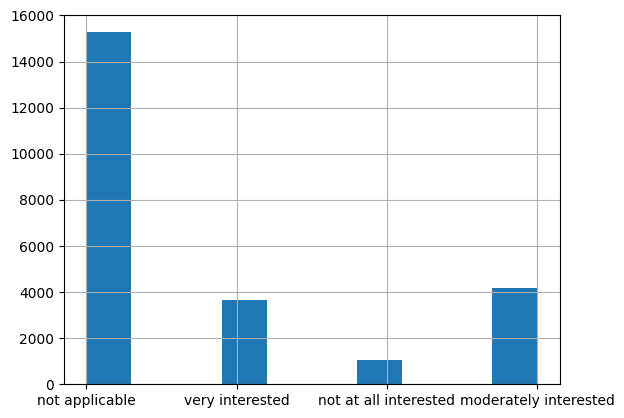

In [19]:
# visualize the data
print(inttech_feature_cleaned.hist(), "\n")
print(inttech_feature_cleaned.value_counts(), "\n")

<Axes: xlabel='inttech', ylabel='Count'>

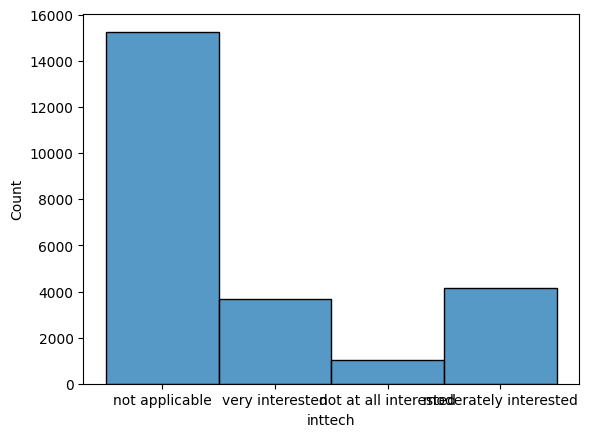

In [20]:
sns.histplot(inttech_feature_cleaned)

It seems as if the largest count happens to be **not applicable** by a large margin. This could mean that the surveyees either did not respond, could not choose, or something the question was skipped. Of all the people who did respond, it seems as if most people are interested in technology.

### **Scifrom Dataset**

In [24]:
scifrom_feature = inttech_scifrom_dataset["scifrom"]

print(scifrom_feature.shape)
print(scifrom_feature.describe())
print(scifrom_feature.unique())
print(scifrom_feature.value_counts())

(24130,)
count             7694
unique              11
top       the internet
freq              3024
Name: scifrom, dtype: object
[NaN, 'the internet', 'magazines', 'tv', 'family', ..., 'friends/colleagues', 'radio', 'other', 'government agencies', 'ted talks']
Length: 12
Categories (24, object): ['newspapers', 'magazines', 'the internet',
                          'books/other printed material', ..., 'uncodeable', 'not available in this release',
                          'not available in this year', 'see codebook']
the internet                     3024
tv                               2607
magazines                         607
newspapers                        547
books/other printed material      354
radio                             168
family                            154
friends/colleagues                151
other                              66
government agencies                15
ted talks                           1
not imputable_(2147483638)          0
not available in thi

In [25]:
scifrom_feature_cleaned = scifrom_feature.apply(lambda z: replace_value(z, ["not imputable_(2147483638)", "not available in this year",
                                                                            "not available in this release", "uncodeable", "skipped on web",
                                                                            "refused", "iap", "not imputable_(2147483637)", "no answer", "dk, na, iap",
                                                                            "I don't have a job", "don't know", "see codebook"], "not applicable"))

In [28]:
scifrom_feature_cleaned = scifrom_feature_cleaned.replace(np.nan, "not applicable")

print(scifrom_feature_cleaned.shape)
print(scifrom_feature_cleaned.describe())
print(scifrom_feature_cleaned.unique())
print(scifrom_feature_cleaned.value_counts())

(24130,)
count              24130
unique                12
top       not applicable
freq               16436
Name: scifrom, dtype: object
['not applicable' 'the internet' 'magazines' 'tv' 'family'
 'books/other printed material' 'newspapers' 'friends/colleagues' 'radio'
 'other' 'government agencies' 'ted talks']
not applicable                  16436
the internet                     3024
tv                               2607
magazines                         607
newspapers                        547
books/other printed material      354
radio                             168
family                            154
friends/colleagues                151
other                              66
government agencies                15
ted talks                           1
Name: scifrom, dtype: int64


<ipython-input-46-266f39e214ef>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  scifrom_histplot.set_xticklabels(scifrom_histplot.get_xticklabels(), rotation = 90)


[Text(0, 0, 'not applicable'),
 Text(1, 0, 'the internet'),
 Text(2, 0, 'magazines'),
 Text(3, 0, 'tv'),
 Text(4, 0, 'family'),
 Text(5, 0, 'books/other printed material'),
 Text(6, 0, 'newspapers'),
 Text(7, 0, 'friends/colleagues'),
 Text(8, 0, 'radio'),
 Text(9, 0, 'other'),
 Text(10, 0, 'government agencies'),
 Text(11, 0, 'ted talks')]

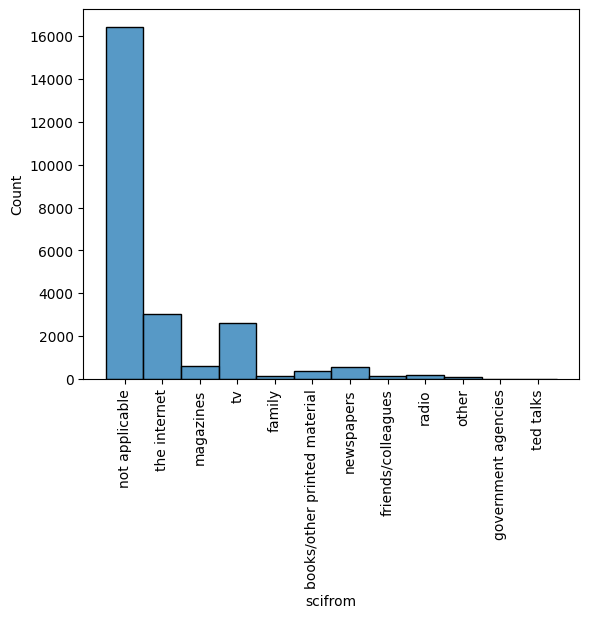

In [46]:
scifrom_histplot = sns.histplot(scifrom_feature_cleaned)
scifrom_histplot.set_xticklabels(scifrom_histplot.get_xticklabels(), rotation = 90)

It seems as if the largest count happens to be **not applicable** by a large margin just like the **inttech** dataset. This could mean that the surveyees either did not respond, could not choose, or something the question was skipped. This does not surprise me. It seems as if of all people who answered, the most popular sources of information is from **the internet*** or **tv**. This makes sense since **the internet** and **tv** are the most readily available and provide the most information the quickest.

### **Combination of Both**

In [50]:
inttech_scifrom_cleaned = pd.DataFrame(columns = ["inttech", "scifrom"])
inttech_scifrom_cleaned["inttech"] = inttech_feature_cleaned
inttech_scifrom_cleaned["scifrom"] = scifrom_feature_cleaned

inttech_scifrom_cleaned.head()

,inttech,scifrom
0,not applicable,not applicable
1,not applicable,the internet
2,not applicable,magazines
3,not applicable,not applicable
4,not applicable,tv


In [53]:
crosstab = pd.crosstab(inttech_scifrom_cleaned["inttech"], inttech_scifrom_cleaned["scifrom"])
print(crosstab)

scifrom                books/other printed material  family  \
inttech                                                       
moderately interested                            93      65   
not applicable                                  107      26   
not at all interested                            24      34   
very interested                                 130      29   

scifrom                friends/colleagues  government agencies  magazines  \
inttech                                                                     
moderately interested                  63                    5        211   
not applicable                         23                    3        138   
not at all interested                  25                    1         37   
very interested                        40                    6        221   

scifrom                newspapers  not applicable  other  radio  ted talks  \
inttech                                                                      
mo

<ipython-input-69-5a0db4820b7e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)


[Text(0, 0, 'magazines'),
 Text(1, 0, 'newspapers'),
 Text(2, 0, 'the internet'),
 Text(3, 0, 'tv'),
 Text(4, 0, 'books/other printed material'),
 Text(5, 0, 'friends/colleagues'),
 Text(6, 0, 'radio'),
 Text(7, 0, 'not applicable'),
 Text(8, 0, 'family'),
 Text(9, 0, 'other'),
 Text(10, 0, 'government agencies'),
 Text(11, 0, 'ted talks')]

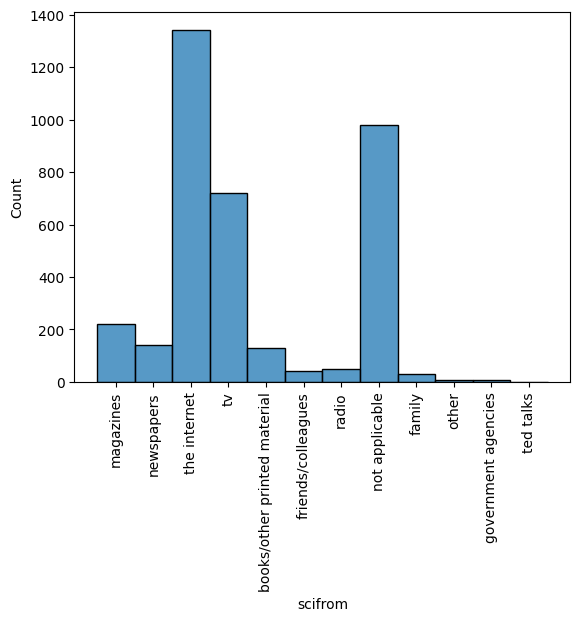

In [69]:
category = "very interested"

inttech_scifrom_filtered = inttech_scifrom_cleaned[inttech_scifrom_cleaned["inttech"] == category]

very_interested_histplot = sns.histplot(x = "scifrom", data = inttech_scifrom_filtered)
very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)

<ipython-input-70-11023665b0d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)


[Text(0, 0, 'tv'),
 Text(1, 0, 'the internet'),
 Text(2, 0, 'newspapers'),
 Text(3, 0, 'family'),
 Text(4, 0, 'magazines'),
 Text(5, 0, 'other'),
 Text(6, 0, 'books/other printed material'),
 Text(7, 0, 'radio'),
 Text(8, 0, 'not applicable'),
 Text(9, 0, 'friends/colleagues'),
 Text(10, 0, 'government agencies')]

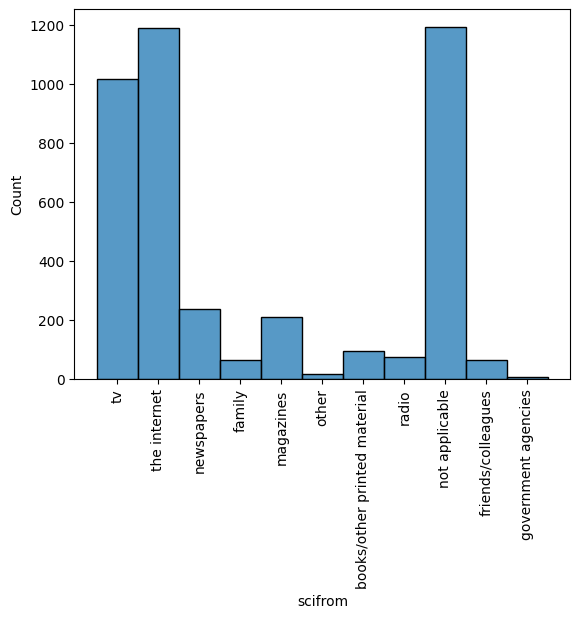

In [70]:
category = "moderately interested"

inttech_scifrom_filtered = inttech_scifrom_cleaned[inttech_scifrom_cleaned["inttech"] == category]

very_interested_histplot = sns.histplot(x = "scifrom", data = inttech_scifrom_filtered)
very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)

Using the crosstab, it seems as if those who are **moderately interested** or **very interested** primarily get their information from the internet and tv. Interestingly, there are signficantly more people who are **very interested** get their information from the **the internet** with a value $1343$ than from **tv** with a value of $721$. Yet, for those who are **moderately interested**, the number of people who get their information from **the internet** vs **tv** are roughly the same. I wonder if those who **very interested** are just on the internet all day are more technically adept so they prefer **the internet**. Only one person who was **very interested** gets their information from **ted talks**. In addition, most of the people who are **moderately interested** did not share where they got their information.  

In [ ]:
|